# Introduction

Name : Dinda Tirta Rahayu

Batch : DS-004

---------------
# The Problem

As online retailers and marketplaces aggresively add thousands of merchants to their platforms, unauthorized white-labeling, fake product listings and image threft have emerged as e-commerce risks.

Product classification could help Shopee teams in future prospects to build product matching models or product recommendations to users.
So, here Shopee share their products data with **each class initialized** to build the product detection that could detect class of products.




-------------
# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pathlib

# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras
import os
import io
from PIL import Image

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
import argparse

from keras.applications.mobilenet import MobileNet
from keras.models import Model
from keras.layers import (GlobalAveragePooling2D, Dropout, Dense)
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_accuracy

import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

import matplotlib.pyplot as plt


In [2]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

print(tf.__version__)

Default GPU Device:/device:GPU:0
2.7.0


# Download Dataset From Kaggle

In [ ]:
# Install Kaggle library in Google Collaboratory.

## Install Kaggle library
!pip install kaggle

## Make a directory named `.kaggle` 
!mkdir ~/.kaggle

## Copy the kaggle.json into this new directory 
!cp kaggle.json ~/.kaggle/

## Change permission for this directory : 
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
%%time
! kaggle datasets download -d davydev/shopee-code-league-20 

100% 17.3G/17.3G [06:44<00:00, 53.0MB/s]
100% 17.3G/17.3G [06:44<00:00, 46.0MB/s]
CPU times: user 6.39 s, sys: 1.19 s, total: 7.58 s
Wall time: 6min 45s


--------------
# Data Documentation


* Description : This dataset contains images of Shopee seller's product.

* Contents : The dataset contains a total of 81924 images.

All image are not relatively consistent lighthing and white balance.

* Format : All images are RGB with different images of size in .jpg format. The images are separated in 42 sub-folders that initialized from **00 class untill 41 class**. Images name pick are random.

I want to assume kind of each classes in the **Data Exploration session**, so here we go!

In [3]:
#Checking GPU version

if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

print(tf.__version__)

Default GPU Device:/device:GPU:0
2.7.0


# Data Loading

In [4]:
# Load file from google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read The Dataset

df = pd.read_csv('/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/train.csv')
df.head()

,filename,category
0,45e2d0c97f7bdf8cbf3594beb6fdcda0.jpg,3
1,f74d1a5fc2498bbbfa045c74e3cc333e.jpg,3
2,f6c172096818c5fab10ecae722840798.jpg,3
3,251ffd610399ac00fea7709c642676ee.jpg,3
4,73c7328b8eda399199fdedec6e4badaf.jpg,3


In this .csv file, we could see the filename and their category. So, we didn't have any information that necessary here. We would not use this file.

In [6]:

#counts the number of files in each subfolder in a directory
def count_files(rootdir):
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " images file in folder " + \
            str(path.name))
            
data_dir = '/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/train/train/'
count_files(data_dir)

There are 2683 images file in folder 00
There are 2703 images file in folder 01
There are 2687 images file in folder 02
There are 2703 images file in folder 03
There are 2703 images file in folder 04
There are 2641 images file in folder 05
There are 2641 images file in folder 06
There are 2661 images file in folder 07
There are 2700 images file in folder 08
There are 2698 images file in folder 09
There are 2673 images file in folder 10
There are 1843 images file in folder 11
There are 2691 images file in folder 12
There are 2682 images file in folder 13
There are 2685 images file in folder 14
There are 2632 images file in folder 15
There are 2665 images file in folder 16
There are 1553 images file in folder 17
There are 2104 images file in folder 18
There are 2679 images file in folder 19
There are 2654 images file in folder 20
There are 2598 images file in folder 21
There are 2623 images file in folder 22
There are 2540 images file in folder 23
There are 2705 images file in folder 24


As we can see above, we have data 41 class with more than 2000, except class in range 32 untill 41 that are with 0 images (blank).

# Data Exploration

In [7]:
# Lets check how many data we've got

## Import library `pathlib` to convert string into path
import pathlib

## Define path
folder_00 = list(pathlib.Path('/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/train/train/00').glob('*.jpg'))
folder_01 = list(pathlib.Path('/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/train/train/01').glob('*.jpg'))
folder_02 = list(pathlib.Path('/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/train/train/02').glob('*.jpg'))
folder_03 = list(pathlib.Path('/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/train/train/03').glob('*.jpg'))
folder_04 = list(pathlib.Path('/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/train/train/04').glob('*.jpg'))
folder_05 = list(pathlib.Path('/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/train/train/05').glob('*.jpg'))
folder_06 = list(pathlib.Path('/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/train/train/06').glob('*.jpg'))
folder_07 = list(pathlib.Path('/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/train/train/07').glob('*.jpg'))
folder_08 = list(pathlib.Path('/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/train/train/08').glob('*.jpg'))
folder_09 = list(pathlib.Path('/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/train/train/09').glob('*.jpg'))



Class :  00


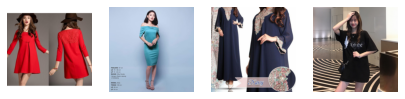

Class :  01


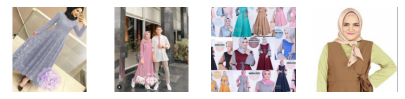

Class :  02


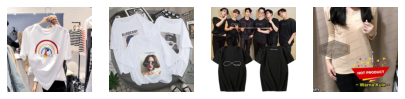

Class :  03


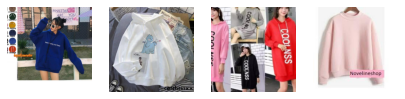

Class :  04


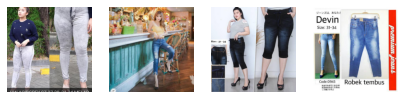

Class :  05


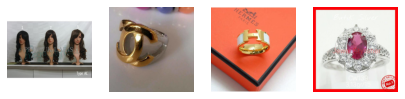

Class :  06


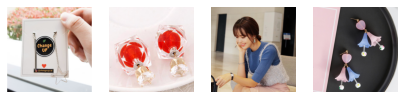

Class :  07


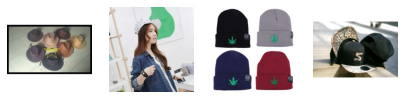

Class :  08


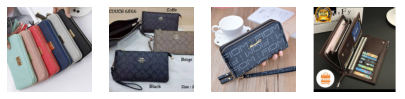

Class :  09


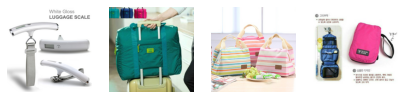

In [8]:
# Visualization of the first 5 images from each class

classes = {
    '00' : folder_00,
    '01' : folder_01,
    '02' : folder_02,
    '03' : folder_03,
    '04' : folder_04,
    '05' : folder_05,
    '06' : folder_06,
    '07' : folder_07,
    '08' : folder_08,
    '09' : folder_09,
}


for cls in classes.keys():
  folder_name = classes[cls]
  fig = plt.figure(figsize=(7, 7))
  columns = 4
  rows = 1
  print('Class : ', cls)
  for index in range(1, columns*rows +1):
      fig.add_subplot(rows, columns, index)
      image = plt.imread(str(folder_name[index]))
      plt.imshow(image)
      plt.axis("off")
  plt.show()

# Summary

We would like to assume 10 categories that Shopee have in each classes :

* Class 00 : Women's Dress, since we have pictures that contain photos of women's dress products

* Class 01 : Robe or hijab, since we have pictures that contain photos of Robe and hijab products

* Class 02 : T-shirt or tee t-shirt, since we have pictures that contain photos of t-shirt products

* Class 03 : Hoodie, since we have pictures that contain photos of Hoodie products

* Class 04 : Skinny jeans, since we have pictures that contain photos of Skinny jeans products

* Class 05 : Women's accessories, hand jewelery, rings, **actually we can see the categories of classes it's not usualy consist (see the wig picture)**

* Class 06 : Earrings, since we have pictures that contain photos of earrings jeans products

* Class 07 : Hat, it contains all kind of hat 

* Class 08 : Wallet, since we have pictures that contain photos of wallet products

* Class 09 : Travel bag things

----------
# Data Preprocessing

In [9]:
# Setting folder

train_folder=r'/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/train/train'
test_folder=r'/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/test/'

In [10]:
# Setting image size and batch

IMG_WIDTH= 32
IMG_HEIGHT= 32
batch_size = 64

In [16]:
class_names = train_ds.class_names
print('Class names - train      : ', class_names)

class_names = val_ds.class_names
print('Class names - validation : ', class_names)

Class names - train      :  ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41']
Class names - validation :  ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41']


In [13]:
train_folder=r'/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/train/train'
test_folder=r'/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/test/'

IMG_WIDTH= 32
IMG_HEIGHT= 32

### Pipeline Model

In [14]:
# Create train set
%%time

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_folder,
  validation_split=0.9,
  subset="training",
  seed=25,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  label_mode='categorical',
  batch_size=21)

Found 81924 files belonging to 42 classes.
Using 8193 files for training.
CPU times: user 2.42 s, sys: 0 ns, total: 2.42 s
Wall time: 2.98 s


In [15]:
# Create validation set

val_ds = tf.keras.utils.image_dataset_from_directory(
  train_folder,
  validation_split=0.01,
  subset="validation",
  seed=25,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  label_mode='categorical',
  batch_size=21)

Found 81924 files belonging to 42 classes.
Using 819 files for validation.


In [17]:
# Create layer for normalization/rescaling

inputs = tf.keras.Input(shape=(32,32,3))
norm_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) (inputs)

# Model Definition

In [18]:
# Create architecutre of neural network

conv2d_01 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same') (norm_layer)
batch_norm_01 = tf.keras.layers.BatchNormalization() (conv2d_01)
max_pool_01 = tf.keras.layers.MaxPooling2D(2, 2) (batch_norm_01)

conv2d_02 = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same') (max_pool_01)
batch_norm_02 = tf.keras.layers.BatchNormalization() (conv2d_02)
max_pool_02 = tf.keras.layers.MaxPooling2D(2,2) (batch_norm_02)

conv2d_03 = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same') (max_pool_02)
batch_norm_03 = tf.keras.layers.BatchNormalization() (conv2d_03)
max_pool_03 = tf.keras.layers.MaxPooling2D(2,2) (batch_norm_03)

conv2d_04 = tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same') (max_pool_03)
batch_norm_04 = tf.keras.layers.BatchNormalization() (conv2d_04)
max_pool_04 = tf.keras.layers.MaxPooling2D(2,2) (batch_norm_04)

flatten = tf.keras.layers.Flatten() (max_pool_04)

dense_01 = tf.keras.layers.Dense(64, activation='relu') (flatten)
dropout = tf.keras.layers.Dropout(.3) (dense_01)

outputs = tf.keras.layers.Dense(42, activation='softmax') (dropout)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248  

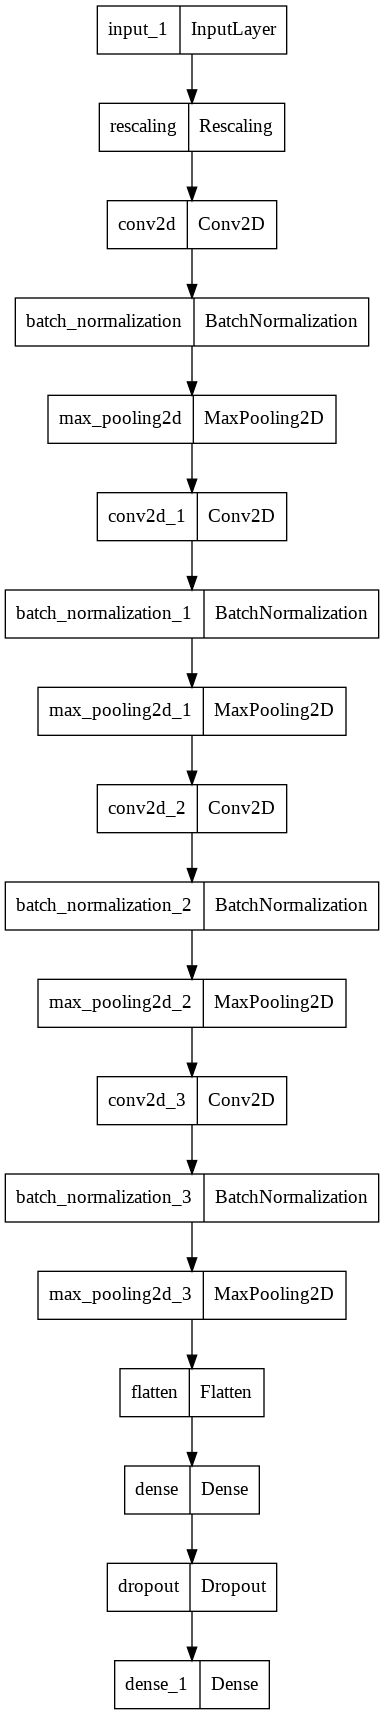

In [19]:
# Plot diagram of architecture model

tf.keras.utils.plot_model(model, "model_new.png")

In [20]:
# Compile the model

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

# Model Evaluation

In [21]:
early = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=10,
    patience=20,
    verbose=1,
    mode="auto"
)

# Model Evaluation

In [22]:
# Train the model

%%time
cnn_model_new = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks = [early],
    verbose=1)

Epoch 1/30
391/391 [==============================] - 988s 2s/step - loss: 3.5511 - accuracy: 0.0720 - val_loss: 3.3873 - val_accuracy: 0.0830
Epoch 2/30
391/391 [==============================] - 37s 93ms/step - loss: 3.2280 - accuracy: 0.1228 - val_loss: 3.2393 - val_accuracy: 0.1258
Epoch 3/30
391/391 [==============================] - 37s 94ms/step - loss: 3.0294 - accuracy: 0.1607 - val_loss: 2.9914 - val_accuracy: 0.1966
Epoch 4/30
391/391 [==============================] - 37s 94ms/step - loss: 2.8674 - accuracy: 0.1948 - val_loss: 2.9751 - val_accuracy: 0.2051
Epoch 5/30
391/391 [==============================] - 37s 93ms/step - loss: 2.7366 - accuracy: 0.2196 - val_loss: 3.1039 - val_accuracy: 0.2039
Epoch 6/30
391/391 [==============================] - 37s 93ms/step - loss: 2.6073 - accuracy: 0.2529 - val_loss: 2.9668 - val_accuracy: 0.1966
Epoch 7/30
391/391 [==============================] - 37s 93ms/step - loss: 2.5035 - accuracy: 0.2848 - val_loss: 3.2433 - val_accuracy: 

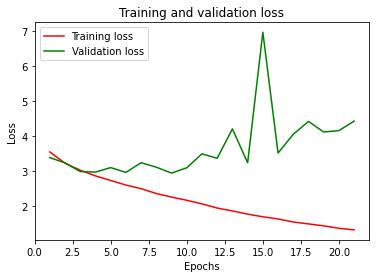

In [23]:
#visualize 

loss = cnn_model_new.history['loss']
val_loss = cnn_model_new.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model Inference

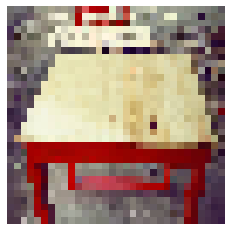

Result     :  [[5.5208564e-04 1.3430102e-03 2.0024145e-04 9.0036041e-04 2.7597414e-05
  3.4849059e-03 1.3303951e-03 3.8469685e-03 1.2483796e-02 1.5594829e-03
  5.1816483e-04 2.4761646e-03 8.4364804e-04 6.6026584e-03 1.5085966e-03
  9.8573305e-02 3.4635662e-04 8.4879197e-04 1.4347133e-03 3.0803893e-04
  9.1509512e-03 1.0487421e-03 2.0673341e-04 4.9737038e-04 3.0629522e-05
  7.6138422e-06 5.1960087e-04 5.6754914e-04 3.0867632e-05 7.0270180e-05
  1.7848679e-04 8.4850192e-01 1.1344044e-10 8.5464857e-11 5.3104809e-11
  9.3212875e-11 8.6381957e-11 1.0558655e-10 2.1693890e-11 1.1553760e-10
  1.8242399e-10 7.1606054e-11]]
Max Class  :  31
Class Name :  31



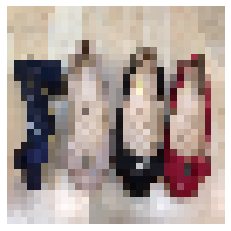

Result     :  [[7.78477490e-01 1.81871697e-01 4.59548392e-05 4.26458340e-04
  8.83362163e-03 7.31402106e-10 1.79696826e-06 3.44641989e-11
  4.38408279e-07 1.35314713e-05 1.69198131e-08 4.15535054e-12
  2.06970952e-07 5.89973759e-09 3.44657913e-10 3.36535071e-11
  2.94681862e-02 8.54330370e-04 1.33221383e-13 1.34181381e-11
  5.36409361e-09 2.66927169e-09 9.86729483e-14 5.59521311e-07
  5.57763451e-06 1.42307797e-11 5.61749181e-09 7.43664858e-16
  1.08517755e-08 1.58359967e-07 1.81879383e-08 1.00770600e-10
  2.57946306e-18 2.79464521e-18 4.41851925e-18 4.10398961e-18
  2.93204984e-18 1.02855203e-17 9.74084270e-19 2.54327288e-18
  4.56688898e-18 2.59670110e-18]]
Max Class  :  0
Class Name :  00



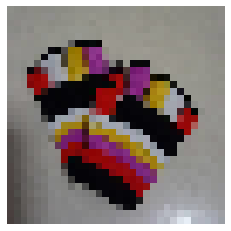

Result     :  [[5.5146666e-04 3.3796350e-03 6.0898758e-04 5.2977161e-04 8.2296545e-05
  2.6219508e-02 6.0385237e-03 1.0455122e-03 6.4528157e-04 1.2688325e-02
  9.8482546e-05 9.2337341e-06 3.9307967e-02 1.1875407e-03 1.2304720e-04
  2.0714742e-01 4.6369908e-04 4.6053763e-05 1.7090434e-04 2.6762073e-03
  2.5724445e-02 6.0047969e-02 1.6251987e-01 1.5160439e-03 9.7599737e-02
  6.6140764e-03 1.5982162e-03 2.2632526e-01 2.4333056e-05 1.6884811e-05
  9.9290892e-02 1.5696481e-02 3.5895724e-07 4.9255476e-07 5.2822355e-07
  2.2494869e-07 8.8863442e-07 5.4631499e-07 7.8937956e-07 6.1694254e-07
  5.3393245e-07 8.7971665e-07]]
Max Class  :  27
Class Name :  27



In [24]:
# Test Images

from tensorflow.keras.preprocessing import image

img_paths = ['/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/test/test/fd663cf2b6e1d7b02938c6aaae0a32d2.jpg',
             '/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/test/test/5ba958eacb23cd7d1673bad4dae55784.jpg',
             '/content/drive/MyDrive/shopee_code_league/_DA_Product_Detection/test/test/7ef61d7cfbad9cfe2db4f64560e3dddd.jpg',
             ]

for filename in img_paths:
  img = image.load_img(filename, target_size=(32, 32))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)

  prediction = model.predict(img_batch)
  result_max_proba = prediction.argmax(axis=-1)[0]
  result_class = class_names[result_max_proba]

  print('Result     : ', prediction)
  print('Max Class  : ', result_max_proba)
  print('Class Name : ', result_class)
  print('')

# Model Improvement

### Pipeline VGG16 Fine Tuning

In [25]:
# initialize the training data augmentation object
trainAug = ImageDataGenerator(
    rotation_range=30,
	  zoom_range=0.15,
  	width_shift_range=0.2,
  	height_shift_range=0.2,
  	shear_range=0.15,
  	horizontal_flip=True,
  	fill_mode="nearest")


# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator()
# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation
# objects
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean

In [26]:
# initialize the training generator
trainGen = tf.keras.utils.image_dataset_from_directory(
	train_folder,
	label_mode="categorical",
  validation_split=0.8,
  subset="training",
	image_size=(IMG_HEIGHT, IMG_WIDTH),
  seed=25,
	color_mode="rgb",
  batch_size=batch_size)

# initialize the validation generator
valGen = tf.keras.utils.image_dataset_from_directory(
	train_folder,
  validation_split=0.07,
  subset="validation",
	label_mode="categorical",
	image_size=(IMG_HEIGHT, IMG_WIDTH),
  seed=25,
	color_mode="rgb",
	batch_size=batch_size)


Found 81924 files belonging to 42 classes.
Using 16385 files for training.
Found 81924 files belonging to 42 classes.
Using 5734 files for validation.


In [27]:
# initialize the testing generator
testGen = tf.keras.utils.image_dataset_from_directory(
	test_folder,
	label_mode="categorical",
	image_size=(IMG_HEIGHT, IMG_WIDTH),
	color_mode="rgb",
	batch_size=batch_size)

Found 12192 files belonging to 1 classes.


In [28]:
trainTotal = 16385
valTotal = 5734

In [29]:

# Create layer for normalization/rescaling

inputs = tf.keras.Input(shape=(32,32,3))
norm_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255) (inputs)

### Model Definition Using Fine Tuning VGG16


In [30]:
# load the VGG16 network, ensuring the head FC layer sets are left
# off

baseModel = VGG16(weights="imagenet", include_top=False,
                  input_tensor=Input(shape=(32, 32, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = Conv2D(32, (5,5),activation="relu", padding='same')(headModel)
headModel = BatchNormalization()(headModel)
headModel = MaxPooling2D(pool_size=5, padding='same')(headModel)
headModel = Conv2D(64, (5,5), activation="relu", padding='same')(headModel)
headModel = BatchNormalization()(headModel)
headModel = MaxPooling2D(pool_size=5, padding='same')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = GlobalAveragePooling2D(name="GlobalAveragepooling")(headModel)
headModel = Dense(42, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

58900480/58889256 [==============================] - 4s 0us/step


In [31]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [32]:
# compile our model (this needs to be done after our setting our
# layers to being non-trainable
print("[INFO] compiling model...")
opt = SGD(learning_rate=1e-4, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


In [33]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

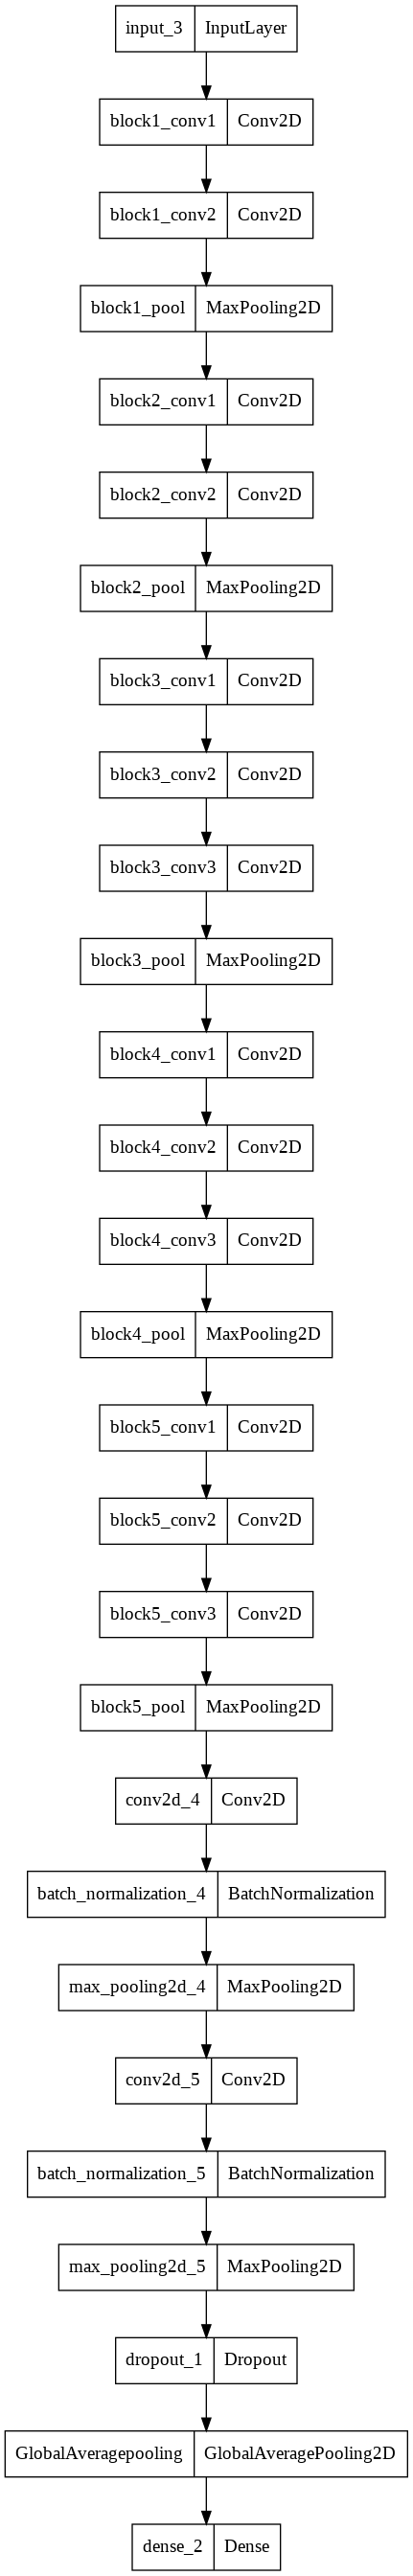

In [34]:
# Plot diagram of architecture model

tf.keras.utils.plot_model(model, "model.png")

### Model Evaluation Using Fine Tuning VGG16

In [35]:
# train the head of the network for a few epochs (all other layers
# are frozen) -- this will allow the new FC layers to start to become
# initialized with actual "learned" values versus pure random


print("[INFO] training head...")
cnn_model = model.fit(
	trainGen,
	validation_data=valGen,
	epochs=10,
  verbose=1)

[INFO] training head...
Epoch 1/10
257/257 [==============================] - 1428s 6s/step - loss: 4.0379 - accuracy: 0.0767 - val_loss: nan - val_accuracy: 0.0328
Epoch 2/10
257/257 [==============================] - 84s 318ms/step - loss: 3.5849 - accuracy: 0.1269 - val_loss: nan - val_accuracy: 0.0328
Epoch 3/10
257/257 [==============================] - 84s 318ms/step - loss: 3.4211 - accuracy: 0.1515 - val_loss: nan - val_accuracy: 0.0328
Epoch 4/10
257/257 [==============================] - 83s 317ms/step - loss: 3.2998 - accuracy: 0.1714 - val_loss: nan - val_accuracy: 0.0328
Epoch 5/10
257/257 [==============================] - 84s 319ms/step - loss: 3.2270 - accuracy: 0.1843 - val_loss: nan - val_accuracy: 0.0328
Epoch 6/10
257/257 [==============================] - 84s 319ms/step - loss: 3.1837 - accuracy: 0.1929 - val_loss: nan - val_accuracy: 0.0328
Epoch 7/10
257/257 [==============================] - 83s 318ms/step - loss: 3.1298 - accuracy: 0.2049 - val_loss: nan - val_

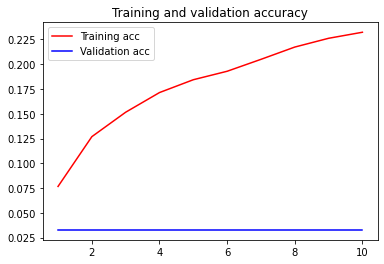

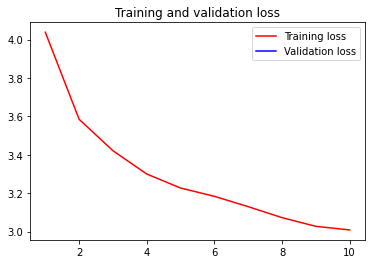

In [37]:
# Visualize accuracy and loss for train and validation data

acc = cnn_model.history['accuracy']
val_acc = cnn_model.history['val_accuracy']
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()
plt.show()

# EDA Analysis

We have data 41 class with more than 2000, except class in range 32 untill 41 that are with 0 images (blank)

We would like to assume 10 categories that Shopee have in each classes :

* Class 00 : Women's Dress, since we have pictures that contain photos of women's dress products

* Class 01 : Robe or hijab, since we have pictures that contain photos of Robe and hijab products

* Class 02 : T-shirt or tee t-shirt, since we have pictures that contain photos of t-shirt products

* Class 03 : Hoodie, since we have pictures that contain photos of Hoodie products

* Class 04 : Skinny jeans, since we have pictures that contain photos of Skinny jeans products

* Class 05 : Women's accessories, hand jewelery, rings

* Class 06 : Earrings, since we have pictures that contain photos of earrings jeans products

* Class 07 : Hat, it contains all kind of hat 

* Class 08 : Wallet, since we have pictures that contain photos of wallet products

* Class 09 : Travel bag things

**From EDA actually we can see the categories of classes it's not usualy consist (see the wig picture in class 05). The class sometimes contains the thing that are not match with other pictures of classes.**

So, I think this problem would be impact the prediction product not which would not consist to classify images.

# Model Analysis



Here I created a Convolutional Neural Network (CNN) model to predict products in the Shopee marketplace.
* First, I use a combination of Convo2D layers, back normalization, Maxpooling and also dence output with activation ouput softmax. I use softmax activation output with the aim that the product prediction is exactly in one class (Multiclass not multilabel). **And the accuracy result is 30 epochs, which is 0.5851 or 58%**. This accuracy is quite good considering that we use image sizes (32, 32), then the layers are also quite small with only 139,082 params trained. The increase in the model is followed by an increase in validation. **This means the model is not overfit.**

* Second, next I use a combination of Convo2DB layers, batch normalization, Maxpooling, dense output with acvivation output but I add fine tuning VGG16 and also on the flatten layer I replace it with GlobalAveragePooling2D so that flatten is smoother so that when it enters dense output, the layer will be easy to see. in the output classification. This model is good for tuning CNN models, so I set it to around 15,178,698 params. Then get an accuracy of 0.1736 or 17% with 10 epochs. When compared to the accuracy of the 10th epoch in the previous model, it is 0.3665 or 36%. This figure is much better than the fine tuning of the VGG16 model. I assume it's because there are too many layers so there is **Vanishing Gradient Problem**

So it can be concluded that we will use the first CNN model because it has better accuracy and the model does not overfit.

**I suggest building a CNN model with augmented data to increase the variation of image data and standardization, then using ArcFace for loss function (because it can minimize loss well) and tuning with ResNet (to overcome Vanishing Gradient).**